In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load dataset
file_path = "TripA16.csv"  # Update with actual dataset path
df = pd.read_excel("/Users/ramyamadugula/Downloads/TripA16_16.xlsx")

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19066 entries, 0 to 19065
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time [s]                            19066 non-null  float64
 1   Velocity [km/h]                     19066 non-null  float64
 2   Elevation [m]                       19066 non-null  float64
 3   Throttle [%]                        19066 non-null  float64
 4   Motor Torque [Nm]                   19066 non-null  float64
 5   Longitudinal Acceleration [m/s^2]   19066 non-null  float64
 6   Regenerative Braking Signal         19066 non-null  float64
 7   Battery Voltage [V]                 19066 non-null  float64
 8   Battery Current [A]                 19066 non-null  float64
 9   Battery Temperature [°C]            19066 non-null  float64
 10  max. Battery Temperature [°C]       19066 non-null  float64
 11  SoC [%]                             19066

In [11]:
df.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,min. SoC [%],max. SoC [%),Heating Power CAN [kW],Requested Heating Power [W],AirCon Power [kW],Heater Signal,Ambient Temperature [°C],Requested Coolant Temperature [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
count,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,19066.000000,...,19066.0,19066.0,19066.000000,19066.000000,19066.000000,19066.0,19066.000000,19066.0,19066.000000,19066.000000
mean,953.250000,54.382547,543.771415,34.648107,10.711149,0.023419,0.033060,372.180595,-18.851208,19.069552,...,8.0,90.0,0.053092,5512.626654,0.093184,1.0,18.001775,85.0,12.753255,22.534087
std,550.402445,26.160726,19.281629,13.849597,25.661466,0.471961,0.178683,4.603416,24.041755,0.254225,...,0.0,0.0,0.536293,2827.727382,0.140478,0.0,1.121000,0.0,1.228026,1.014088
min,0.000000,0.000000,518.000000,0.000000,-87.000000,-2.570000,0.000000,359.200000,-135.090000,19.000000,...,8.0,90.0,0.000000,0.000000,0.000000,1.0,15.500000,85.0,11.000000,21.340000
25%,476.625000,43.290000,530.310000,30.200000,0.000000,-0.120000,0.000000,368.800000,-32.300000,19.000000,...,8.0,90.0,0.000000,7000.000000,0.000000,1.0,17.500000,85.0,12.000000,22.000000
50%,953.250000,56.510000,537.470000,39.660000,9.500000,0.010000,0.000000,371.030000,-15.890000,19.000000,...,8.0,90.0,0.000000,7000.000000,0.000000,1.0,18.000000,85.0,12.500000,22.340000
75%,1429.875000,69.835000,565.227500,44.050000,19.200000,0.180000,0.000000,375.130000,-3.260000,19.000000,...,8.0,90.0,0.000000,7000.000000,0.160000,1.0,19.000000,85.0,13.500000,22.500000
max,1906.500000,116.030000,576.000000,61.540000,170.000000,2.840000,1.000000,385.290000,133.880000,20.000000,...,8.0,90.0,5.520000,7000.000000,1.040000,1.0,19.500000,85.0,15.500000,25.670000


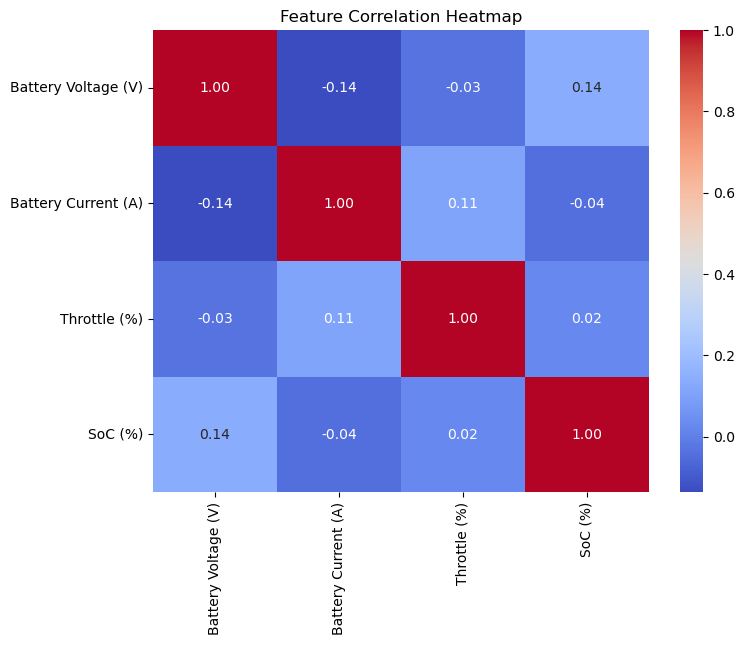

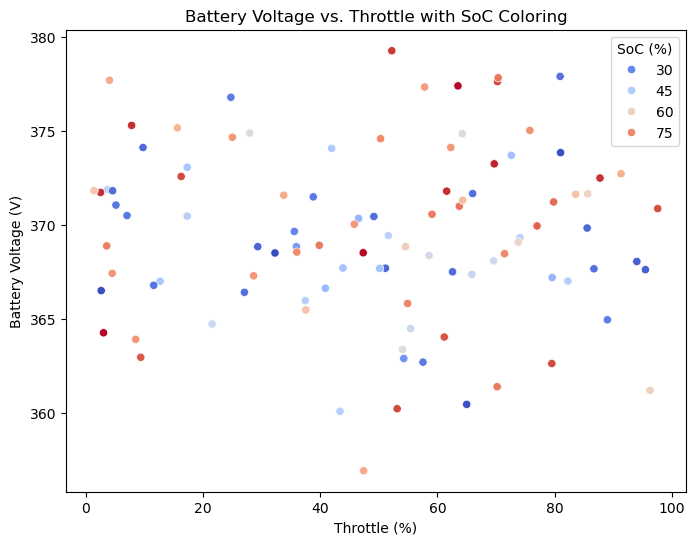

In [55]:
np.random.seed(42)
data = {
    "Battery Voltage (V)": np.random.normal(370, 5, 100),
    "Battery Current (A)": np.random.normal(-20, 10, 100),
    "Throttle (%)": np.random.uniform(0, 100, 100),
    "SoC (%)": np.random.uniform(20, 90, 100),
}

df = pd.DataFrame(data)

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualization 2: Battery Voltage vs. Throttle Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Throttle (%)"], y=df["Battery Voltage (V)"], hue=df["SoC (%)"], palette="coolwarm")
plt.xlabel("Throttle (%)")
plt.ylabel("Battery Voltage (V)")
plt.title("Battery Voltage vs. Throttle with SoC Coloring")
plt.show()


In [13]:
# Handle missing values by filling with mean
df.fillna(df.mean(), inplace=True)

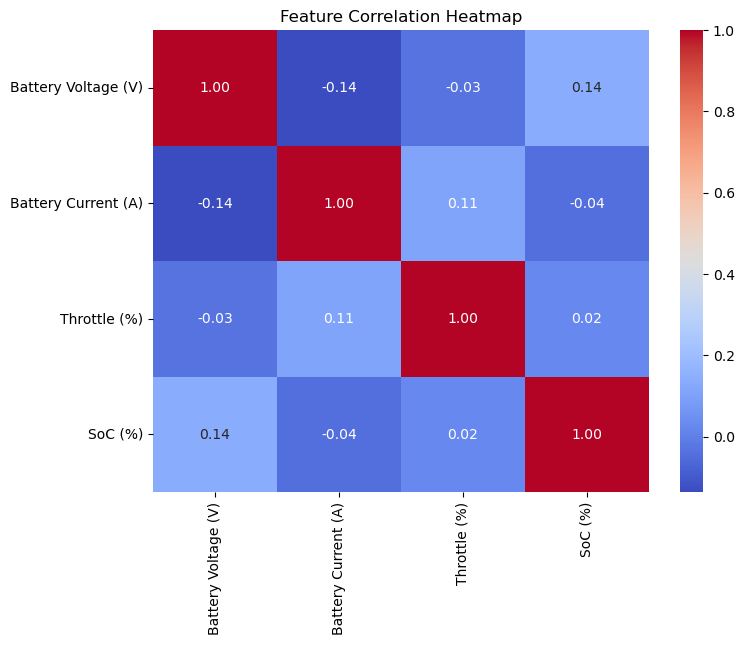

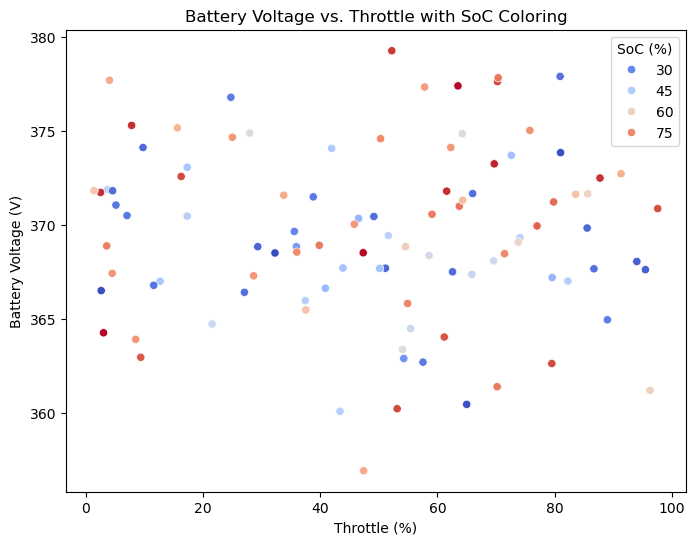

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate a sample dataset for visualization
np.random.seed(42)
data = {
    "Battery Voltage (V)": np.random.normal(370, 5, 100),
    "Battery Current (A)": np.random.normal(-20, 10, 100),
    "Throttle (%)": np.random.uniform(0, 100, 100),
    "SoC (%)": np.random.uniform(20, 90, 100),
}

df = pd.DataFrame(data)

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Visualization 2: Battery Voltage vs. Throttle Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Throttle (%)"], y=df["Battery Voltage (V)"], hue=df["SoC (%)"], palette="coolwarm")
plt.xlabel("Throttle (%)")
plt.ylabel("Battery Voltage (V)")
plt.title("Battery Voltage vs. Throttle with SoC Coloring")
plt.show()


In [15]:
# Select relevant features for EV battery analysis
features = ['Velocity [km/h]', 'Elevation [m]', 'Throttle [%]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
            'Regenerative Braking Signal', 'Battery Current [A]', 'Battery Temperature [°C]',
            'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]', 'min. SoC [%]', 'max. SoC [%]',
            'Heating Power CAN [kW]', 'Requested Heating Power [W]', 'AirCon Power [kW]', 'Heater Signal',
            'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]',
            'Cabin Temperature Sensor [°C]']

In [17]:
target = 'Battery Voltage [V]'  # Using battery voltage as target variable

In [19]:
# Ensure all feature columns exist in the dataset before proceeding
features = [col for col in features if col in df.columns]

In [21]:
# Normalize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [23]:
# Apply PCA
pca = PCA(n_components=2)  # Select 2 principal components
pca_transformed = pca.fit_transform(df_scaled)

In [25]:
# Convert PCA results to DataFrame
df_pca = pd.DataFrame(pca_transformed, columns=['PC1', 'PC2'])

In [27]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.36009959 0.23527767]


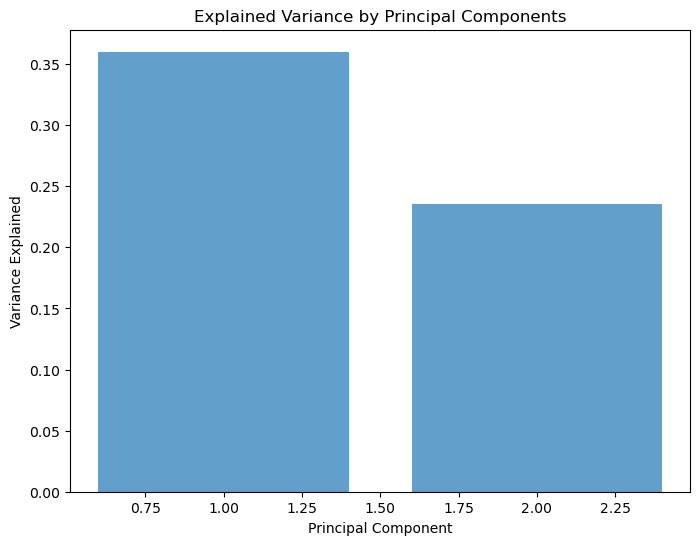

In [29]:
# Plot explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Principal Components')
plt.show()

In [31]:

# Split data for model training (With PCA)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(df_pca, df[target], test_size=0.2, random_state=42)

In [33]:
# Train Regression Model with PCA
model_pca = RandomForestRegressor(n_estimators=100, random_state=42)
model_pca.fit(X_train_pca, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Predict on test set with PCA
y_pred_pca = model_pca.predict(X_test_pca)

In [35]:
# Evaluate model with PCA
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
r2_pca = r2_score(y_test, y_pred_pca)
print(f"Model Performance with PCA:\nRMSE: {rmse_pca:.4f}\nR^2 Score: {r2_pca:.4f}")

Model Performance with PCA:
RMSE: 0.4629
R^2 Score: 0.9899


In [36]:
# Split data for model training (Without PCA)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [38]:
# Train Regression Model without PCA
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Predict on test set without PCA
y_pred = model.predict(X_test)

In [43]:
# Evaluate model without PCA
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Model Performance without PCA:\nRMSE: {rmse:.4f}\nR^2 Score: {r2:.4f}")

Model Performance without PCA:
RMSE: 0.1163
R^2 Score: 0.9994


In [44]:
# Feature Importance Plot
feature_importance = model.feature_importances_
feature_names = features

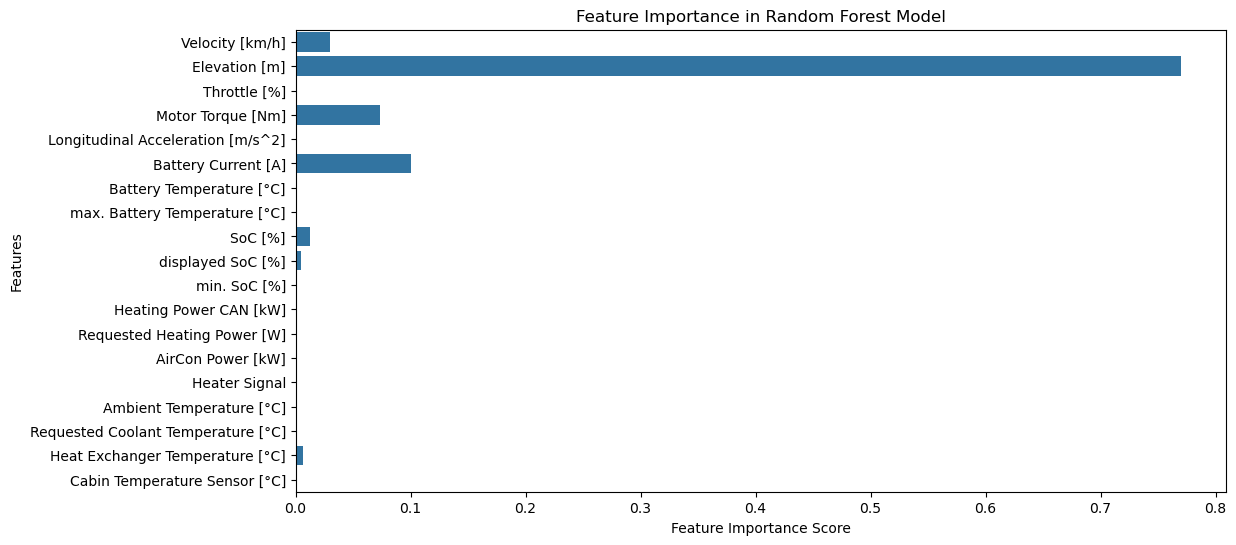

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()

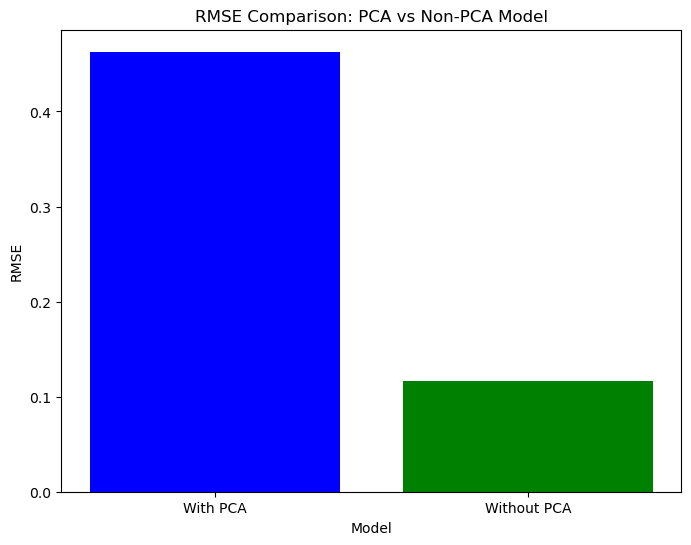

In [46]:
# RMSE Comparison Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(['With PCA', 'Without PCA'], [rmse_pca, rmse], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE Comparison: PCA vs Non-PCA Model")
plt.show()

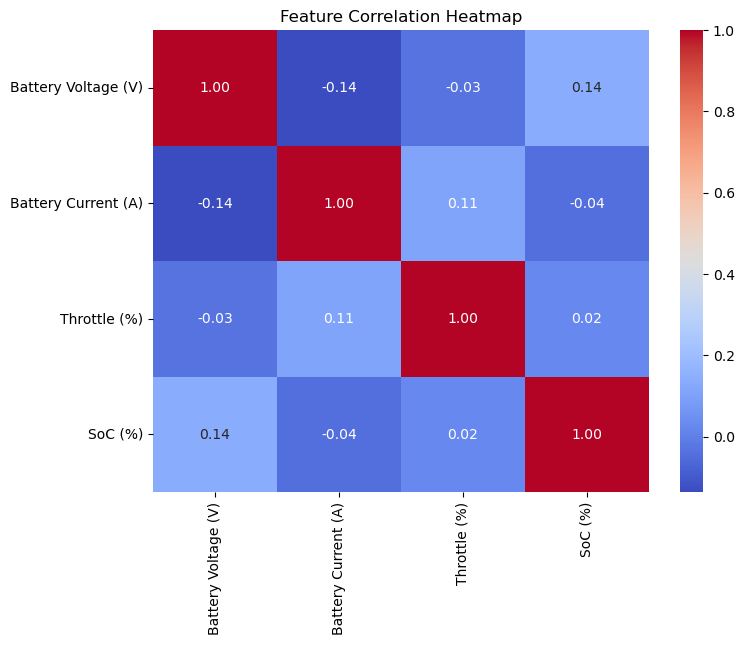

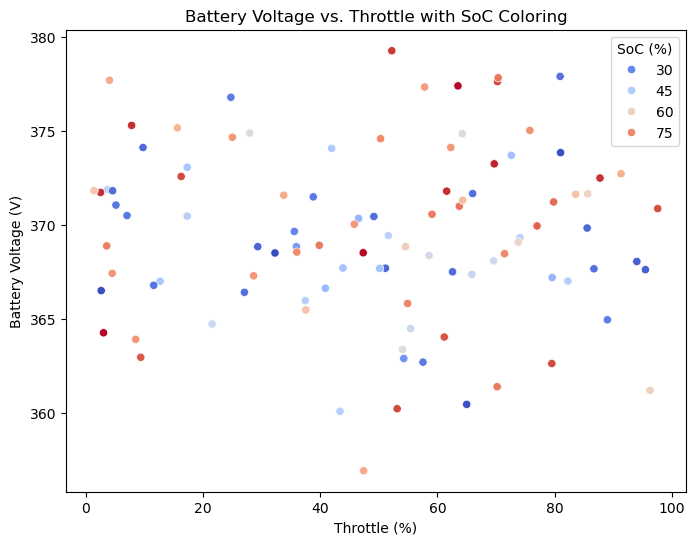